# Purpose

This notebook shows how to generate multivariate gaussian data. In some experimental settings, you might find yourself having to create synthetic data to test out some algorithms. What's a better way than to test your ideas on a controlled multivariate gaussian data set?

# Synthetic Data Generation

Here we generate synthetic data with 4 variables defined as follows.

* $X_0 \sim \mathcal{N}(0.0, 1.0)$
* $X_1 \sim \mathcal{N}(1.0, 1.5)$
* $X_2 \sim \mathcal{N}(-8, 2.0)$
* $Y \sim \mathcal{N}(3 + 2.5 \times X_0 + 1.8 \times X_1 + 0.3 \times X_2, 1.0)$

In [1]:
import numpy as np

np.random.seed(37)
N = 10000

x0 = np.random.normal(0, 1, N)
x1 = np.random.normal(1, 1.5, N)
x2 = np.random.normal(-8, 2.0, N)
y = np.random.normal(3 + (2.5 * x0) + (1.8 * x1) + (0.3 * x2), 1, N)

# Visualize Synthetic Data

Let's visualize the distribution of the variables individually.

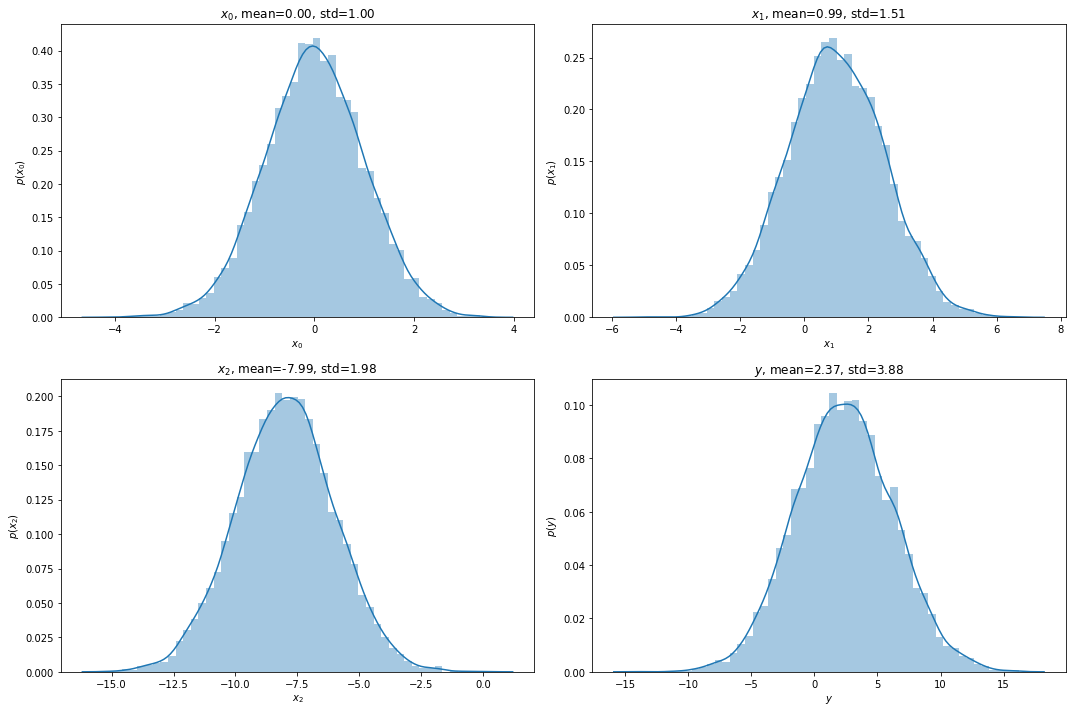

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = np.ravel(ax)

for n, x, a in zip(['x_0', 'x_1', 'x_2', 'y'], [x0, x1, x2, y], ax):
    sns.distplot(x, ax=a)
    mu = np.mean(x)
    std = np.std(x)
    
    a.set_title(r'${}$, mean={:.2f}, std={:.2f}'.format(n, mu, std))
    a.set_xlabel(r'${}$'.format(n))
    a.set_ylabel(r'$p({})$'.format(n))
    
plt.tight_layout()

# Learning

Let's form a data matrix from the variables and see if we can use regression to learn from the data. Note that the regression coefficients are almost perfectly recovered and the $r^2$ values is nearly 1.0.

In [3]:
data = np.concatenate([
    x0.reshape(-1, 1), 
    x1.reshape(-1, 1), 
    x2.reshape(-1, 1), 
    y.reshape(-1, 1)], axis=1)
X = data[:, [0, 1, 2]]
y = data[:, [3]]

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X)
print(r2_score(y, y_pred))

[3.0559283]
[[2.49915295 1.79268551 0.30748514]]
0.9325471481811427


# A slightly more complicated example

Here, we synthesize data in a slightly more complicated way. Note that the dependence on y is only on $X_2$.

* $X_0 \sim \mathcal{N}(0.0, 1.0)$
* $X_1 \sim \mathcal{N}(1.0, 1.5)$
* $X_2 \sim \mathcal{N}(2.5 \times X_0 + 1.8 \times X_1, 1.0)$
* $Y \sim \mathcal{N}(3 + 0.3 \times X_2, 1.0)$

In [5]:
N = 10000
x0 = np.random.normal(0, 1, N)
x1 = np.random.normal(1, 1.5, N)
x2 = np.random.normal(2.5 * x0 + 1.8 * x1, 1.0, N)
y = np.random.normal(3 + 0.3 * x2, 1.0, N)

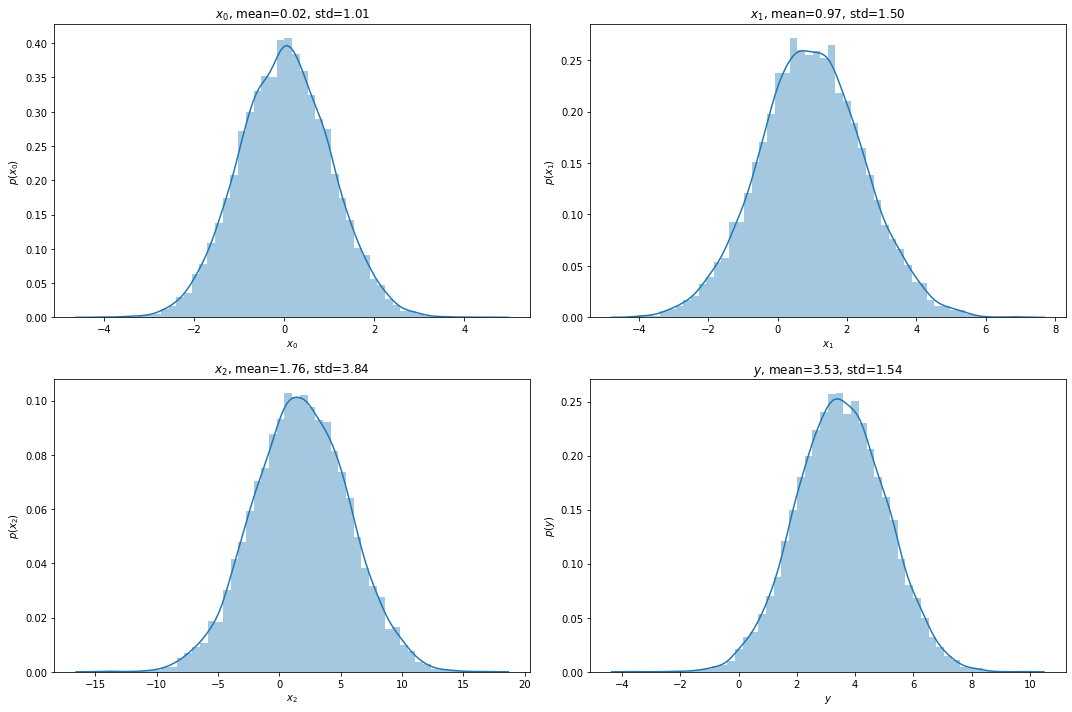

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = np.ravel(ax)

for n, x, a in zip(['x_0', 'x_1', 'x_2', 'y'], [x0, x1, x2, y], ax):
    sns.distplot(x, ax=a)
    mu = np.mean(x)
    std = np.std(x)
    
    a.set_title(r'${}$, mean={:.2f}, std={:.2f}'.format(n, mu, std))
    a.set_xlabel(r'${}$'.format(n))
    a.set_ylabel(r'$p({})$'.format(n))
    
plt.tight_layout()

Note that the regression coefficients are nearly perfect to the model but the $r^2$ values is nearly close to 0.6. The coefficients for $X_0$ and $X_1$ are basically 0 (zero).

In [7]:
data = np.concatenate([
    x0.reshape(-1, 1), 
    x1.reshape(-1, 1), 
    x2.reshape(-1, 1), 
    y.reshape(-1, 1)], axis=1)
X = data[:, [0, 1, 2]]
y = data[:, [3]]

model = LinearRegression()
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X)
print(r2_score(y, y_pred))

[3.00829309]
[[-0.00997024 -0.02660497  0.3116155 ]]
0.5729998545969257


# A very difficult example

Here, $X_2$ depends on $X_0$ and $X_1$, $Y$ depends on $X_2$, and $X_3$ depends on $Y$. Let's see what we get when attempting to learn a regression model from this data.

* $X_0 \sim \mathcal{N}(0.0, 1.0)$
* $X_1 \sim \mathcal{N}(1.0, 1.5)$
* $X_2 \sim \mathcal{N}(2.5 \times X_0 + 1.8 \times X_1, 1.0)$
* $Y \sim \mathcal{N}(3 + 0.3 \times X_2, 1.0)$
* $X_3 \sim \mathcal{N}(2 + 5.5 \times Y, 1.0)$

In [8]:
N = 10000
x0 = np.random.normal(0, 1, N)
x1 = np.random.normal(1, 1.5, N)
x2 = np.random.normal(2.5 * x0 + 1.8 * x1, 1, N)
y = np.random.normal(3 + 0.3 * x2, 1, N)
x3 = np.random.normal(2 + 5.5 * y, 1, N)

data = np.concatenate([
    x0.reshape(-1, 1), 
    x1.reshape(-1, 1), 
    x2.reshape(-1, 1), 
    x3.reshape(-1, 1),
    y.reshape(-1, 1)], axis=1)
X = data[:, [0, 1, 2, 3]]
y = data[:, [4]]

model = LinearRegression()
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X)
print(r2_score(y, y_pred))

[-0.25007845]
[[1.02117404e-04 1.49722373e-03 9.89853281e-03 1.75692433e-01]]
0.9858997362088735


Note that the only coeffcient larger than 0.01 is $X3$. One may be mistaken to say that $Y$ depends on $X3$ (because we simulated $X3$ from $Y$). It's interesting that $r^2$ is high though.